### DBSCAN Clustering Example

This notebook demonstrates the DBSCAN clustering algorithm using a synthetic dataset.


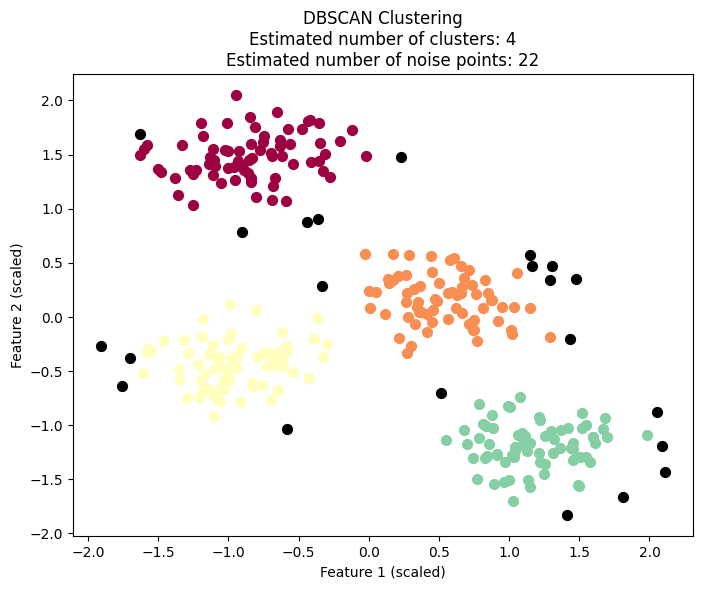

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Veri oluşturma
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# DBSCAN algoritmasını uygulama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
labels = db.labels_

# Küme sayısını belirleme
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Kümeleme sonuçlarını görselleştirme
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Siyah olarak renklendir (gürültü)

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & (labels == k)]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50)

plt.title(f"DBSCAN Clustering\nEstimated number of clusters: {n_clusters_}\nEstimated number of noise points: {n_noise_}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
